In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
churn_df = pd.read_csv(r"C:\Users\tarak\Data Files\CSV\telecom_churn_data.csv")

In [3]:
# Data quick checks(Shape,Size,Length,Head,Tail,Data Types)
print('\nShape\n',churn_df.shape)
print('\nSize\n',churn_df.size)
print('\nLength\n',len(churn_df))
print('\nHead\n',churn_df.head())
print('\nTail\n',churn_df.tail())
print('\nData types\n',churn_df.dtypes)


Shape
 (2000, 16)

Size
 32000

Length
 2000

Head
    year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2015       100198  409-8743  Female   36                     62   
1  2015       100643  340-5930  Female   39                    149   
2  2015       100756  372-3750  Female   65                    126   
3  2015       101595  331-4902  Female   24                    131   
4  2015       101653  351-8398  Female   40                    191   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0          

In [4]:
# check the data types of the columns and null values
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [5]:
# Drop irrelevant columns
churn_df = churn_df.drop(['phone_no', 'customer_id'], axis=1)

In [6]:
# Identify categorical and numerical columns
cat_cols = churn_df.select_dtypes(include='object').columns.tolist()
num_cols = churn_df.select_dtypes(include=['int64','float64']).columns.tolist()
print('\ncategorical columns:\n',cat_cols)
print('\nnumerical columns:\n',num_cols)


categorical columns:
 ['gender', 'multi_screen', 'mail_subscribed']

numerical columns:
 ['year', 'age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive', 'customer_support_calls', 'churn']


In [7]:
# Convert all numeric columns to numeric type, replacing non-numeric values with NaN
for i in num_cols:
    churn_df[i] = pd.to_numeric(churn_df[i], errors='coerce')

In [8]:
# check missing values
churn_df.isnull().sum()

year                       0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [9]:
# Handle missing values

# Numerical: fill with mean
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean') 
churn_df[num_cols] = num_imputer.fit_transform(churn_df[num_cols])

# Categorical: fill with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
churn_df[cat_cols] = cat_imputer.fit_transform(churn_df[cat_cols])


In [10]:
# Verify that missing values are handled
print(churn_df.isnull().sum())

year                      0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64


In [11]:
# check and remove duplicates
churn_df.duplicated().sum()
churn_df = churn_df.drop_duplicates()

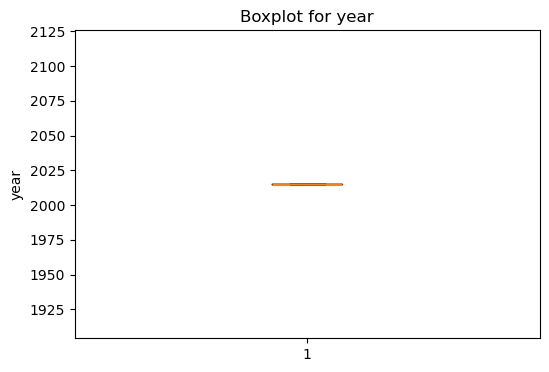

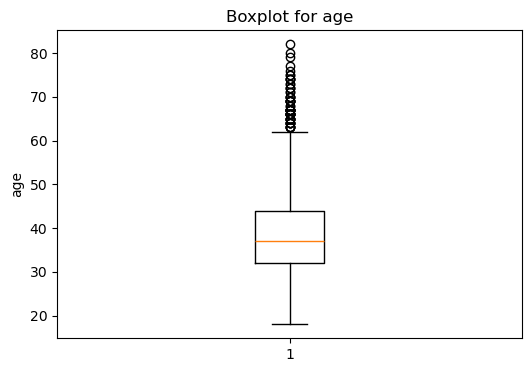

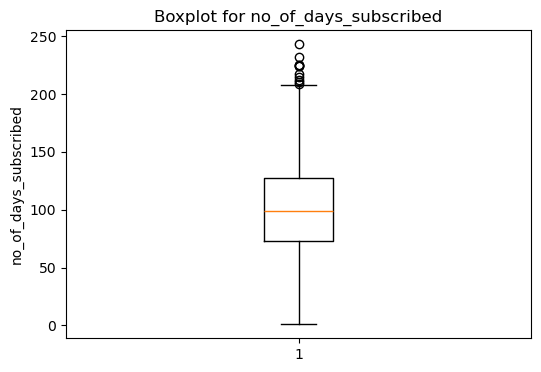

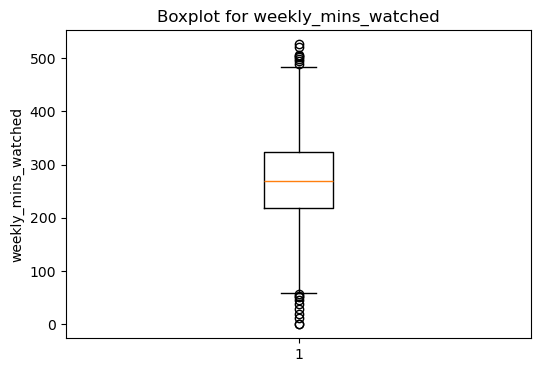

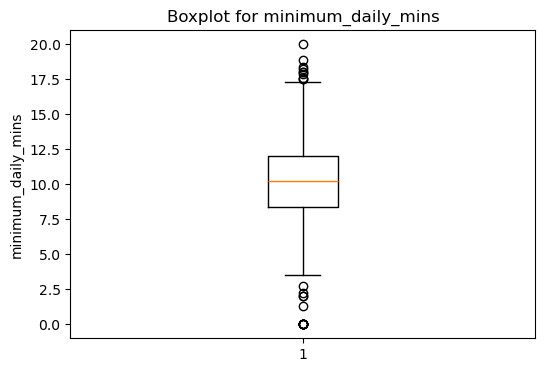

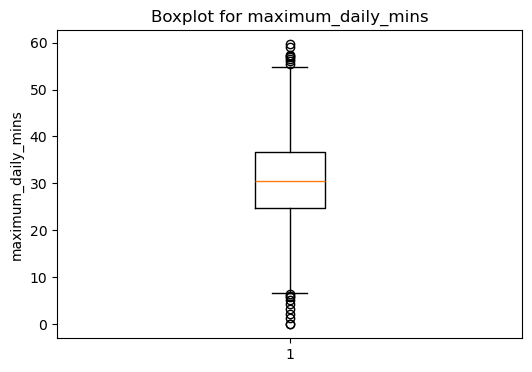

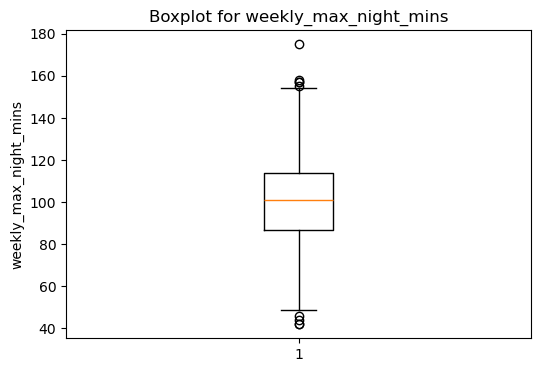

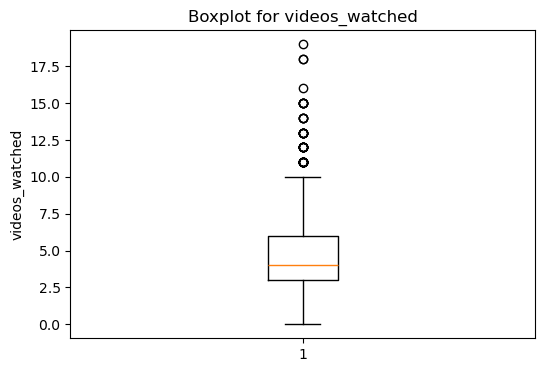

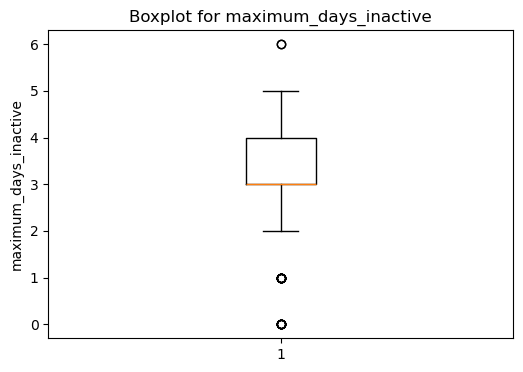

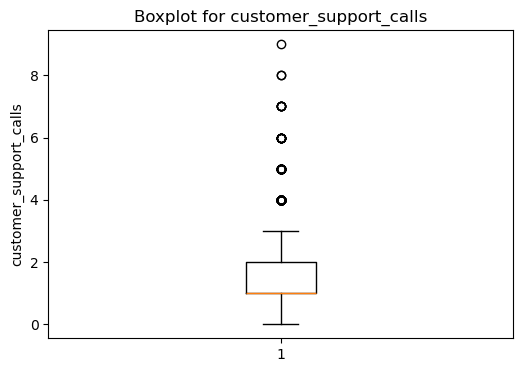

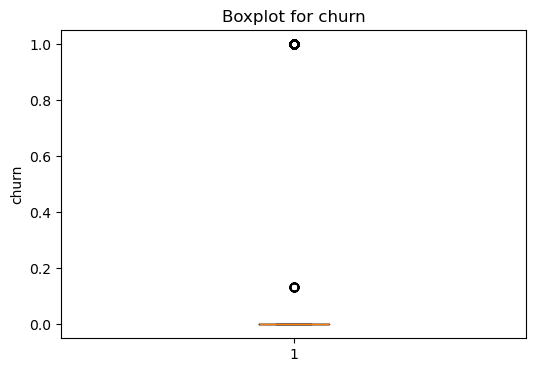

In [12]:
import os
# Create directory to save frequency tables (if it doesn't exist)

save_folder=r"C:\Users\tarak\Data Files\EDA\Boxplot_before_outlie_analysis"
os.makedirs(save_folder, exist_ok=True) 
for i in num_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(churn_df[i])
    plt.title(f'Boxplot for {i}')
    plt.ylabel(i)
    plt.savefig(os.path.join(save_folder, f'{i}_before.png'))
    plt.show()
    plt.close()

    Q1 = churn_df[i].quantile(0.25)
    Q3 = churn_df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers=churn_df[(churn_df[i]<lower_limit) | (churn_df[i]>upper_limit)]

    median_value = churn_df[i].median()
    churn_df.loc[(churn_df[i] < lower_limit) | (churn_df[i] > upper_limit), i] = median_value


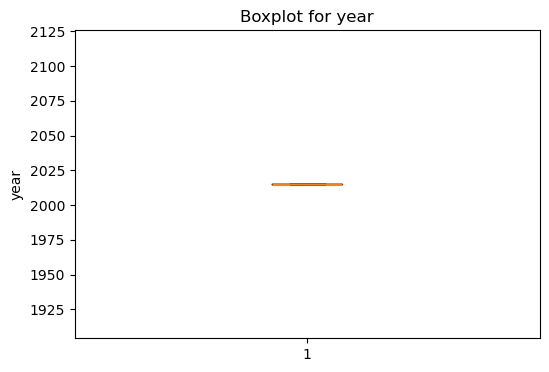

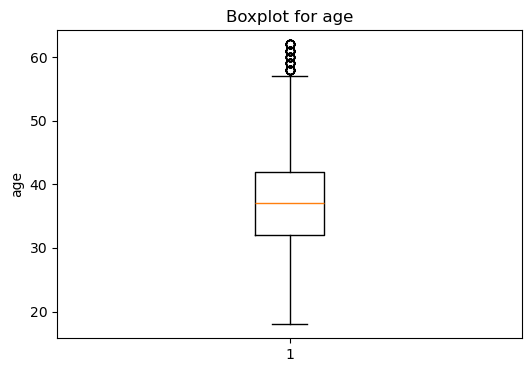

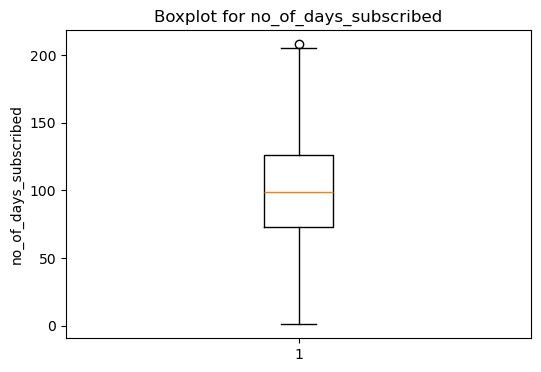

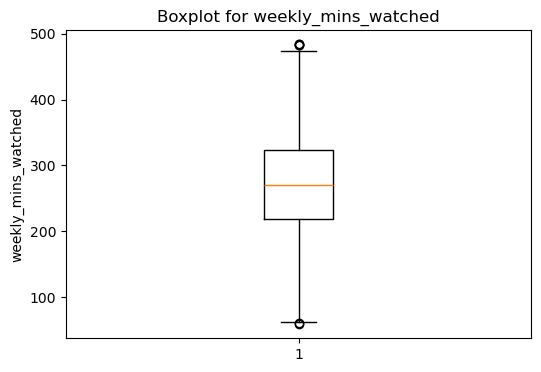

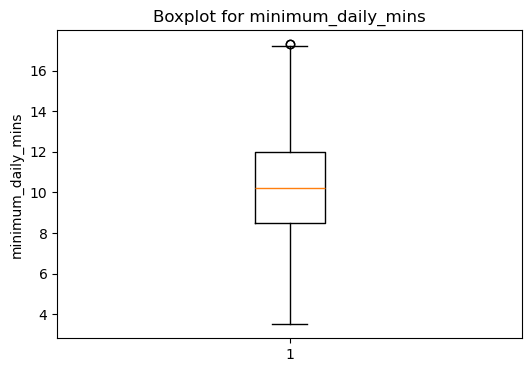

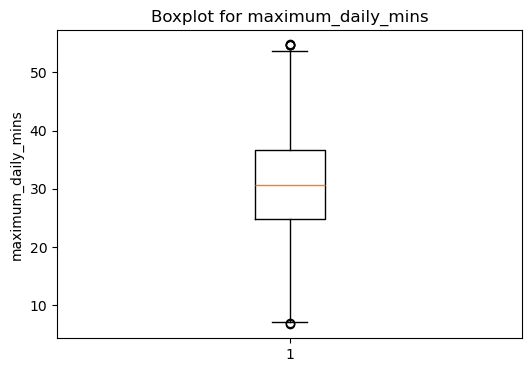

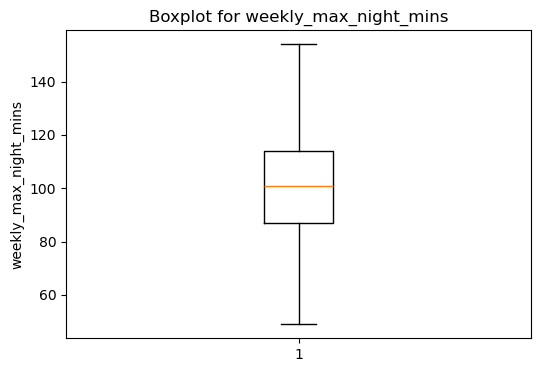

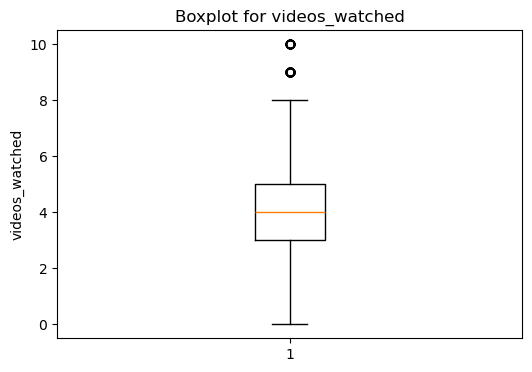

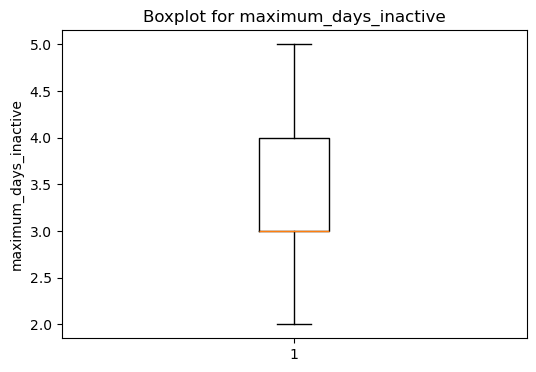

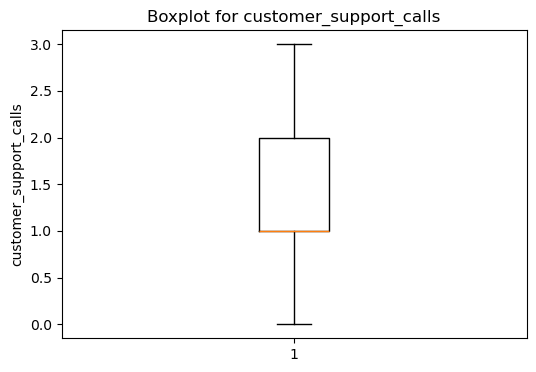

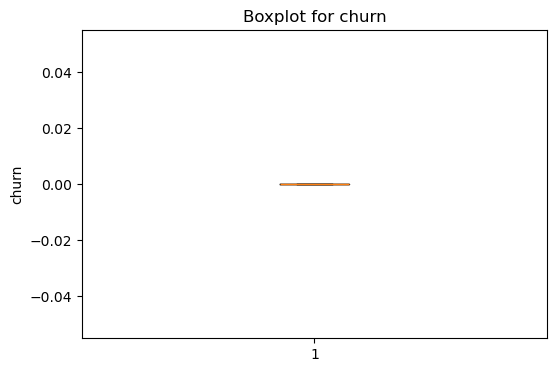

In [13]:
import os
# Create directory to save frequency tables (if it doesn't exist)

save_folder=r"C:\Users\tarak\Data Files\EDA\boxplot after outlier analysis"
os.makedirs(save_folder, exist_ok=True) 
for i in num_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(churn_df[i])
    plt.title(f'Boxplot for {i}')
    plt.ylabel(i)
    plt.savefig(os.path.join(save_folder, f'{i}_after.png'))
    plt.show()
    plt.close()

In [14]:
# Convert churn column from float to integer because it is a binary categorical variable (0/1)
churn_df['churn'] = churn_df['churn'].astype('int')

In [15]:
import os
import pandas as pd

# Create directory to save frequency tables (if it doesn't exist)
os.makedirs(r"C:\Users\tarak\Data Files\EDA\Freq & relative freq table", exist_ok=True)

for i in cat_cols:
    # Create a frequency table with absolute and relative frequencies
    freq_table = pd.DataFrame({
        'Frequency': churn_df[i].value_counts(),
        'Relative Frequency': churn_df[i].value_counts(normalize=True)
    })
    
    # Print the frequency table for the current column
    print(f"\n--- {i} ---")
    print(freq_table)    
    freq_table.to_csv(f"C:/Users/tarak/Data Files/EDA/Freq & relative freq table/{i}_frequency.csv")



--- gender ---
        Frequency  Relative Frequency
gender                               
Male         1077              0.5385
Female        923              0.4615

--- multi_screen ---
              Frequency  Relative Frequency
multi_screen                               
no                 1802               0.901
yes                 198               0.099

--- mail_subscribed ---
                 Frequency  Relative Frequency
mail_subscribed                               
no                    1430               0.715
yes                    570               0.285


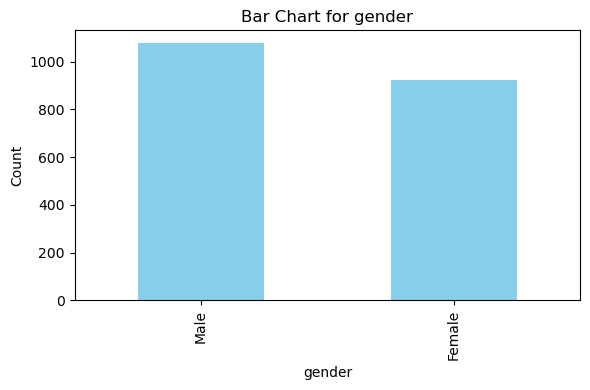

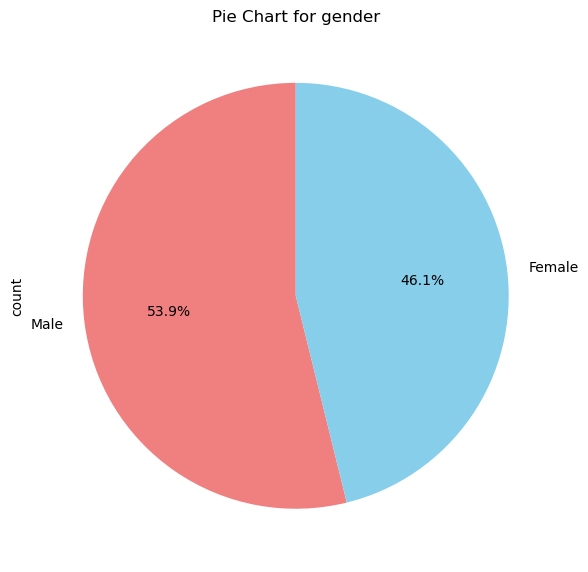

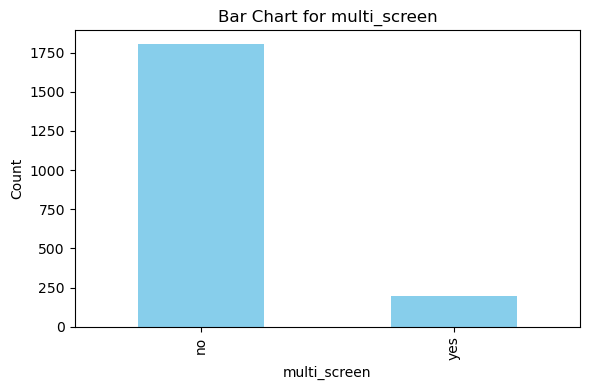

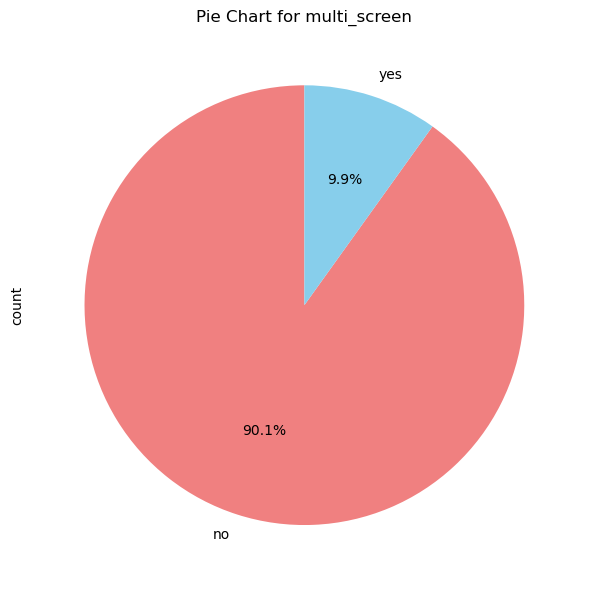

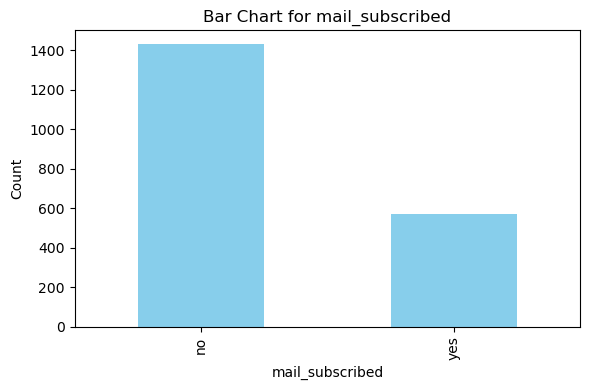

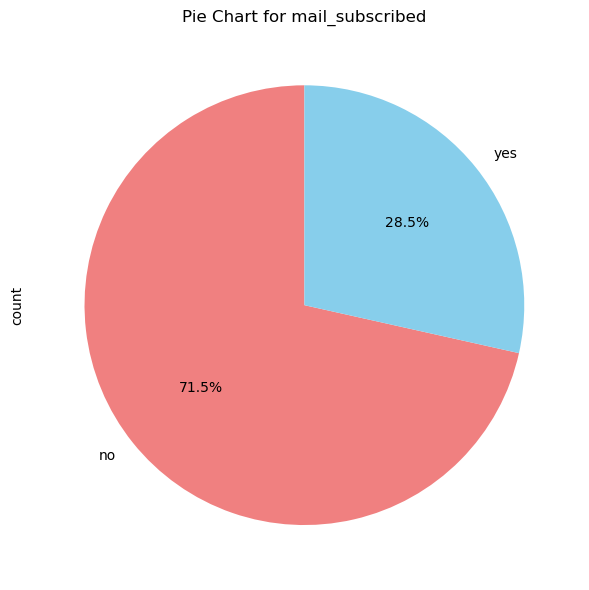

In [16]:
import matplotlib.pyplot as plt
import os

# Folder to save plots
save_folder = r"C:\Users\tarak\Data Files\EDA\bar & pie chart"
os.makedirs(save_folder, exist_ok=True)

for i in cat_cols:
    # Frequency counts
    counts = churn_df[i].value_counts()
    
    # ---------------- Bar Chart ----------------
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart for {i}')
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.tight_layout()
    plt.savefig(f"{save_folder}/{i}_bar.png")
    plt.show()
    plt.close()
    
    # ---------------- Pie Chart ----------------
    plt.figure(figsize=(6,6))
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral','skyblue','lightgreen','orange'])
    plt.title(f'Pie Chart for {i}')
    plt.tight_layout()
    plt.savefig(f"{save_folder}/{i}_pie.png")
    plt.show()
    plt.close()


# ---------------- Bar Chart and Pie Chart ----------------
- Bar Chart: Shows the count/frequency of each category in a column.
-             Taller bars represent categories with higher counts, useful for comparison.
- Pie Chart: Shows the proportion (%) of each category in a column.
-             Larger slices represent categories with higher relative frequency, useful to understand composition.
- This loop plots and saves both charts for all categorical columns.


In [17]:
# Generate statistical summary for numeric and categorical columns
churn_df.describe()

,year,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0
mean,2015.0,37.691000,99.076500,270.434550,10.230100,30.649780,100.382000,4.259500,3.274507,1.260000,0.0
std,0.0,8.613688,38.704104,77.315229,2.597672,8.762352,19.125296,2.073719,0.744850,0.931039,0.0
min,2015.0,18.000000,1.000000,59.250000,3.500000,6.720000,49.000000,0.000000,2.000000,0.000000,0.0
25%,2015.0,32.000000,73.000000,219.450000,8.500000,24.870000,87.000000,3.000000,3.000000,1.000000,0.0
50%,2015.0,37.000000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.0
75%,2015.0,42.000000,126.000000,323.887500,12.000000,36.705000,114.000000,5.000000,4.000000,2.000000,0.0
max,2015.0,62.000000,208.000000,483.750000,17.300000,54.830000,154.000000,10.000000,5.000000,3.000000,0.0


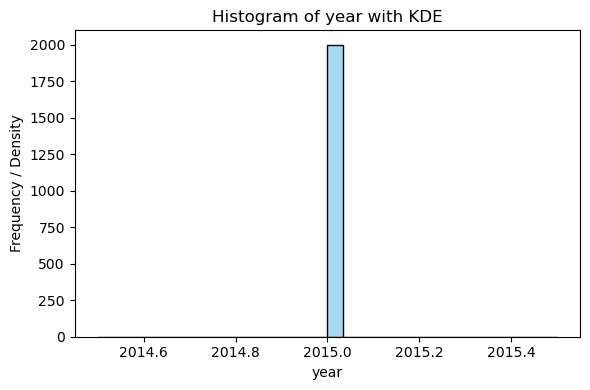

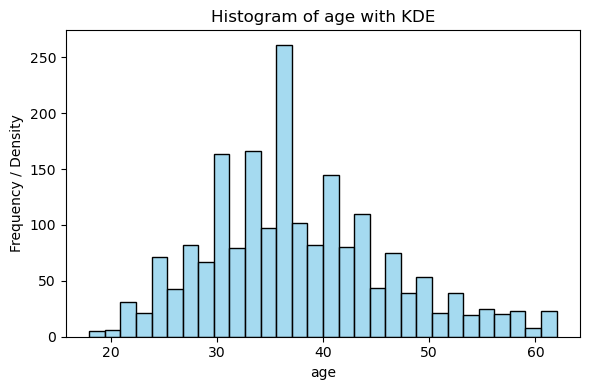

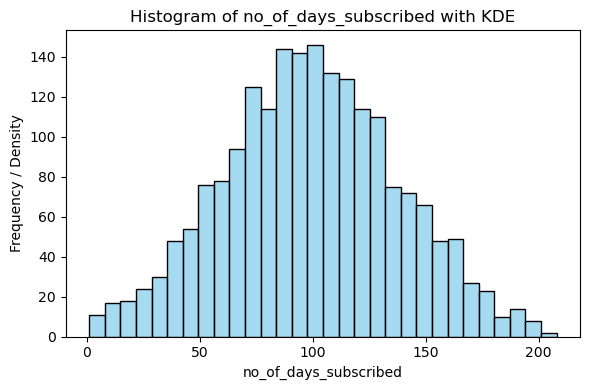

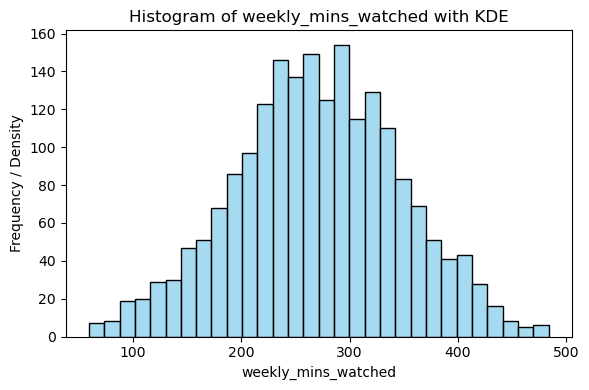

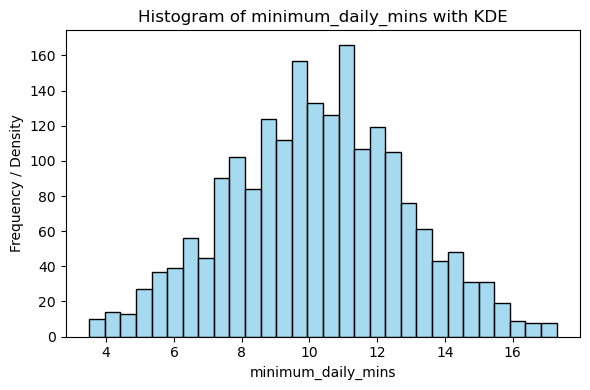

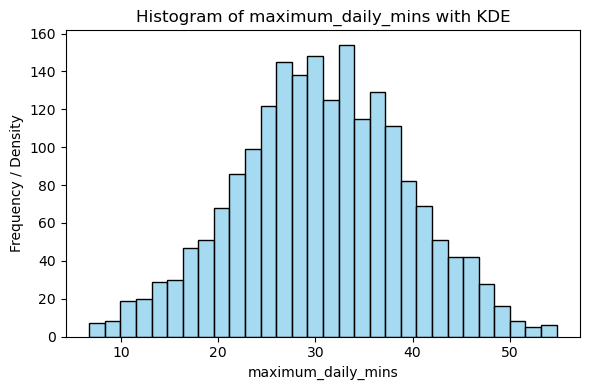

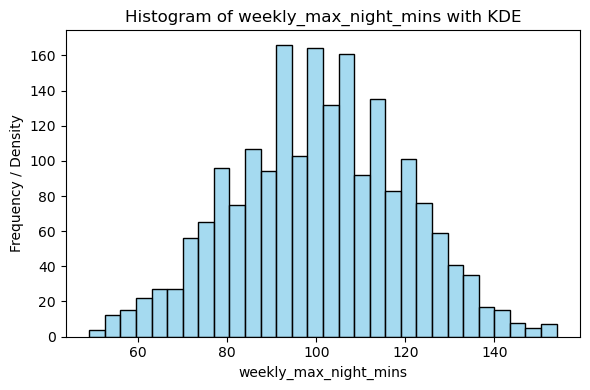

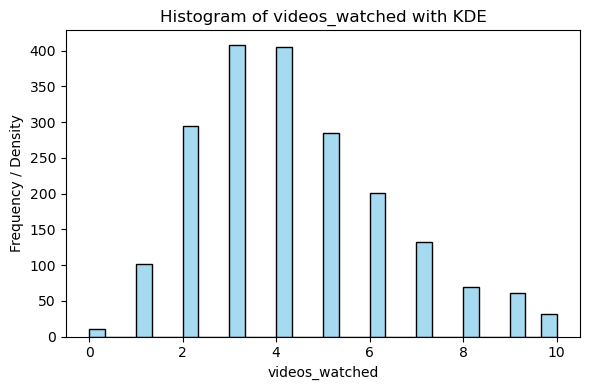

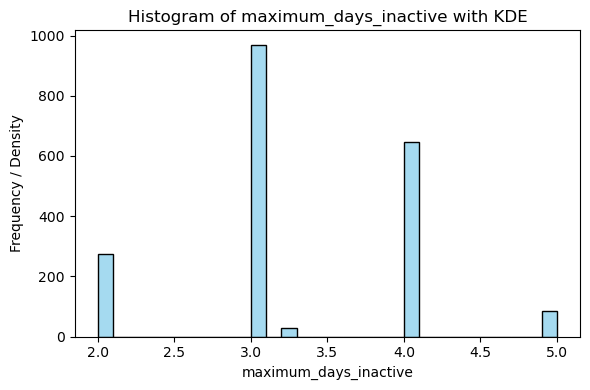

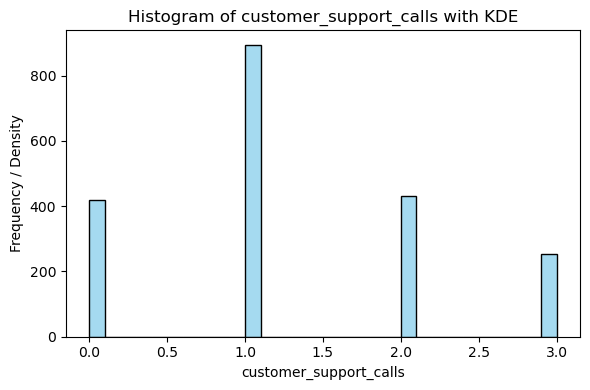

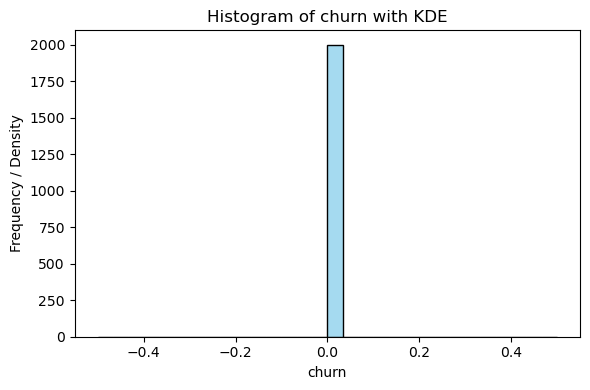

In [18]:
# Plot histograms with KDE to visualize the distribution of all numeric columns
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Folder to save histograms
save_folder = r"C:\Users\tarak\Data Files\EDA\Histogram"
os.makedirs(save_folder, exist_ok=True)

for i in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(churn_df[i], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {i} with KDE')
    plt.xlabel(i)
    plt.ylabel('Frequency / Density')
    plt.tight_layout()
    plt.savefig(f"{save_folder}/{i}_histogram.png")
    plt.show()
    plt.close()


# Understanding (histogram):
- A histogram shows how often each range of values occurs in the data.
- It helps to understand the shape of the data — whether it is normal, skewed, or spread out.
- The KDE line gives a smooth curve showing the overall data pattern.


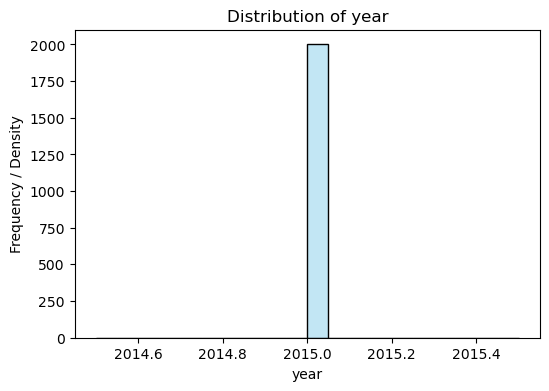

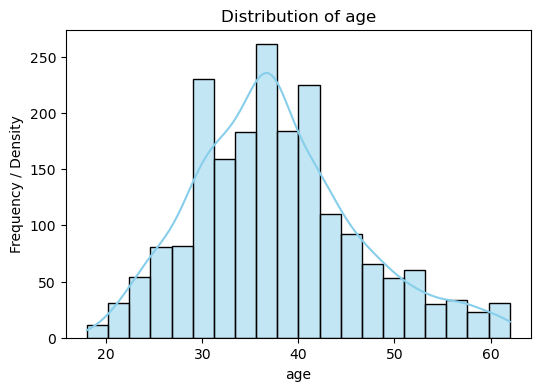

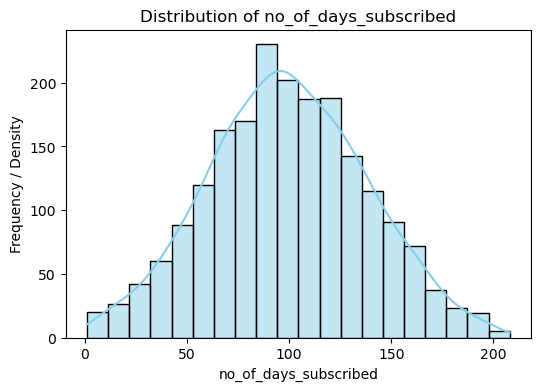

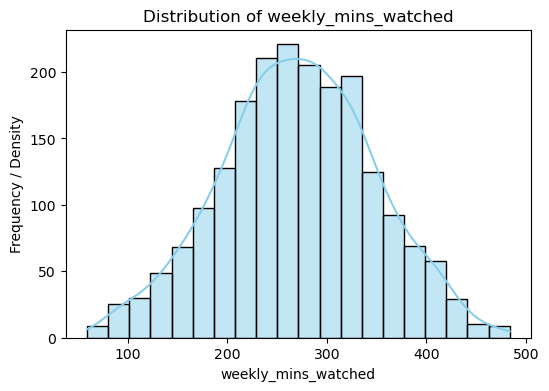

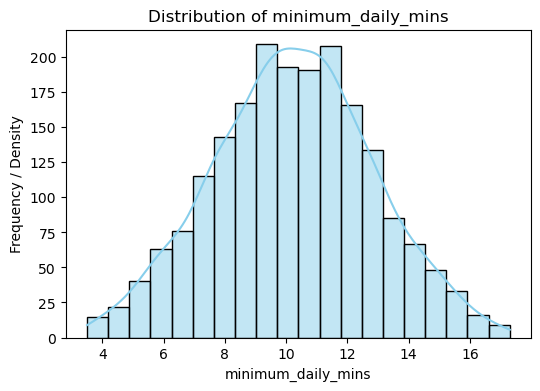

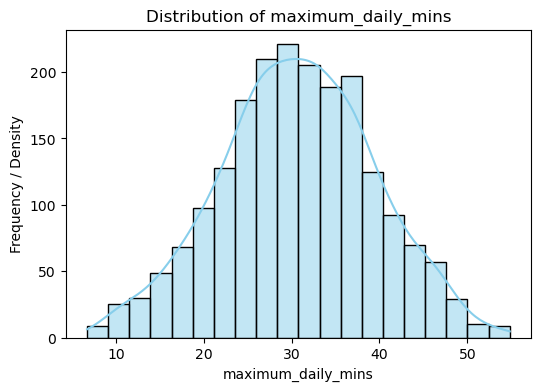

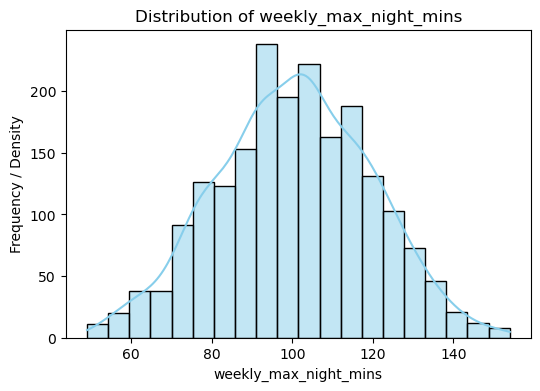

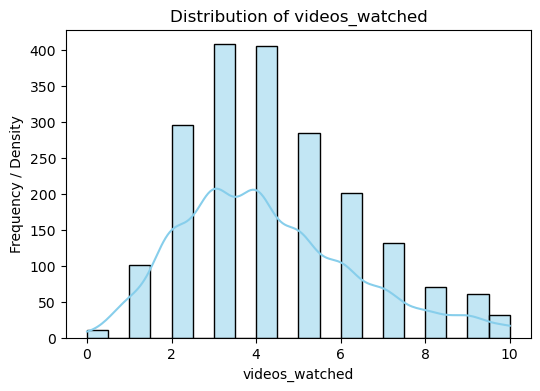

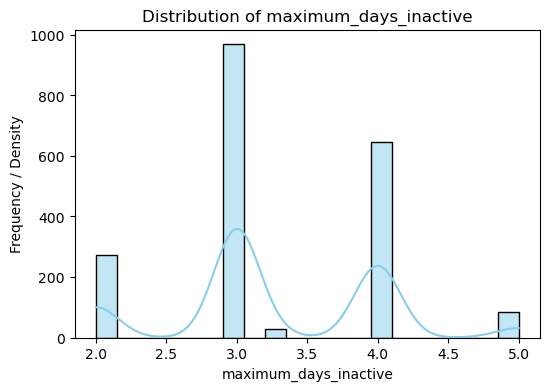

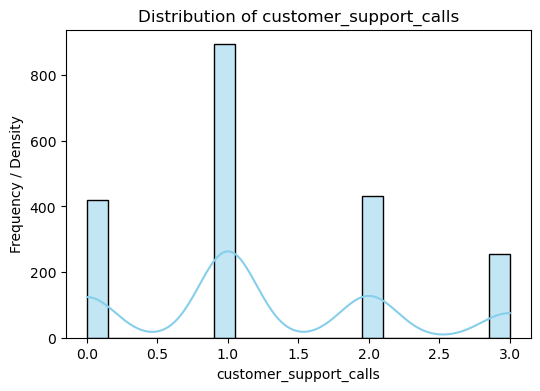

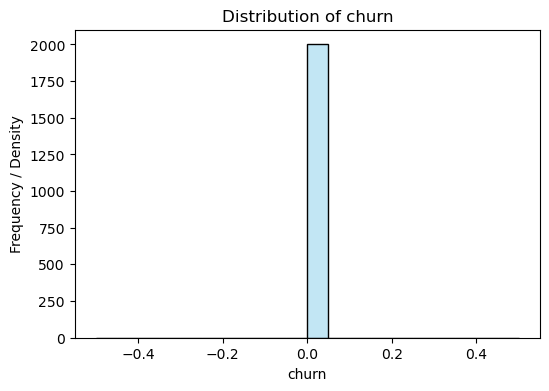

In [19]:
# Plot histograms with KDE to visualize the data distribution of numeric columns
import matplotlib.pyplot as plt
import seaborn as sns
# Folder to save data distribution
save_folder = r"C:\Users\tarak\Data Files\EDA\Data distribution"
os.makedirs(save_folder, exist_ok=True)

for i in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(churn_df[i], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency / Density')
    plt.savefig(f"{save_folder}/{i}_distribution.png")
    plt.show()
    plt.close()


# Understanding (data distribution):
- Data distribution helps to see how the values in each numeric column are spread.
- The histogram shows frequency of values, while the KDE curve shows the smooth overall pattern.
- It helps identify whether the data is normal, skewed, or contains outliers.


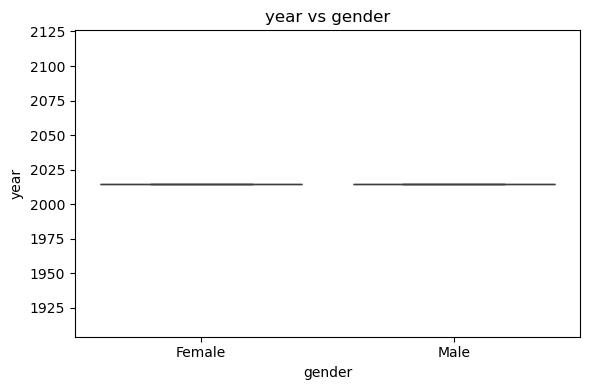

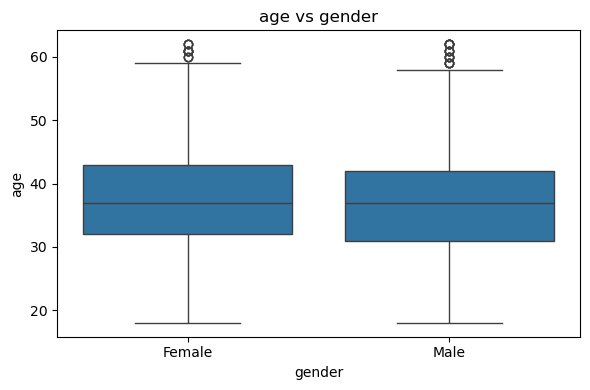

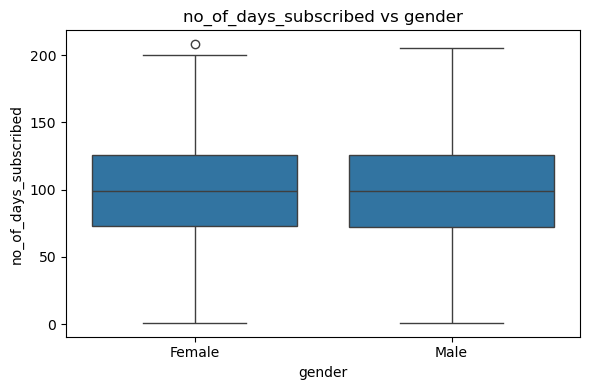

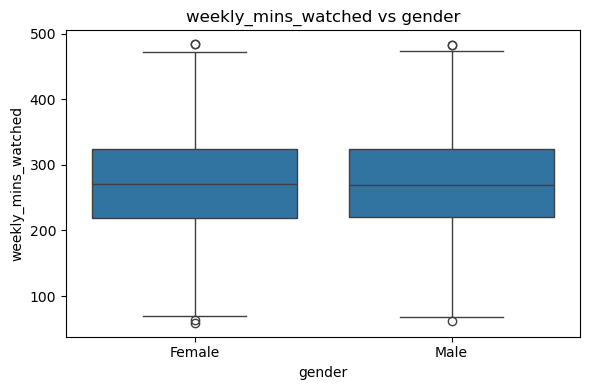

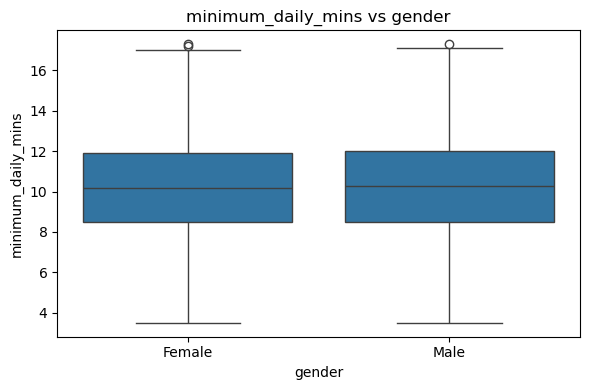

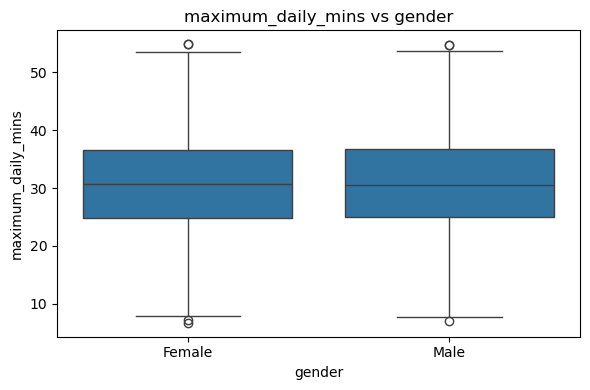

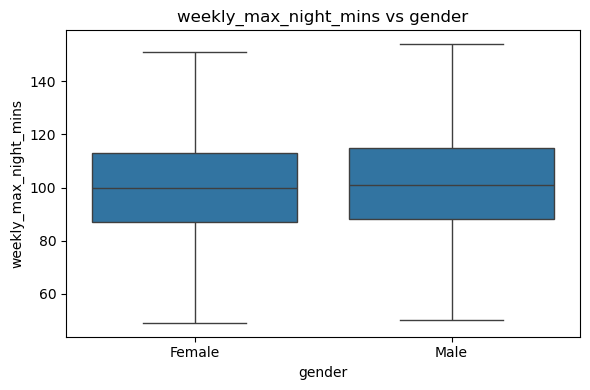

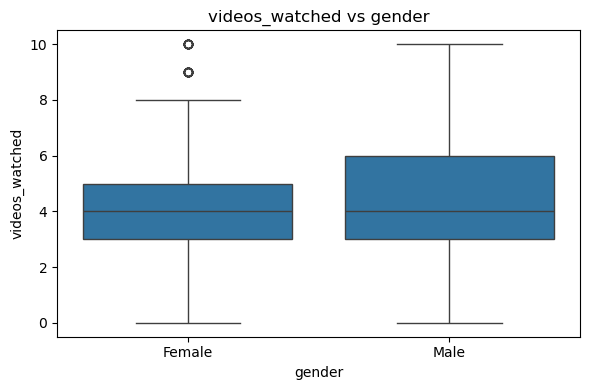

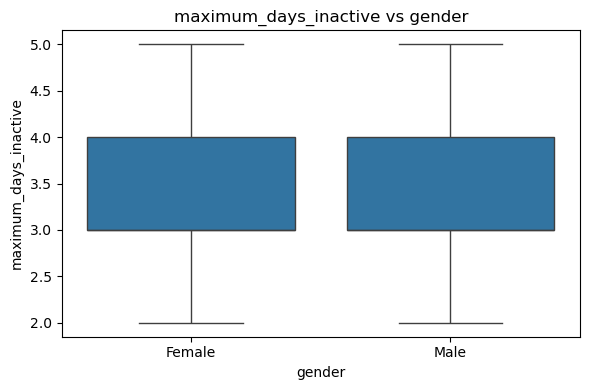

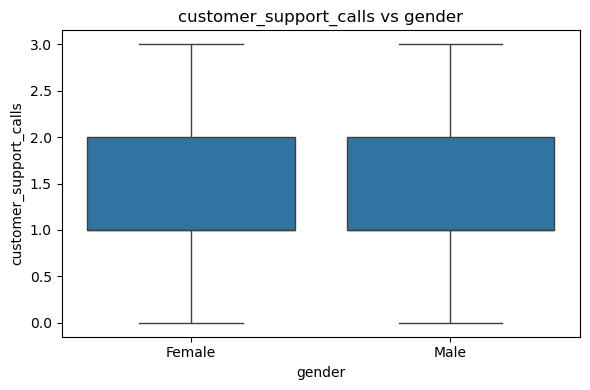

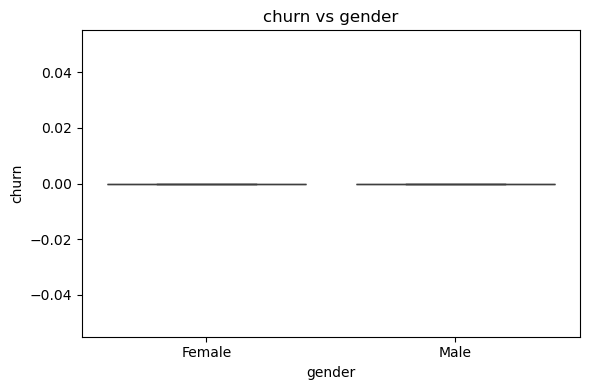

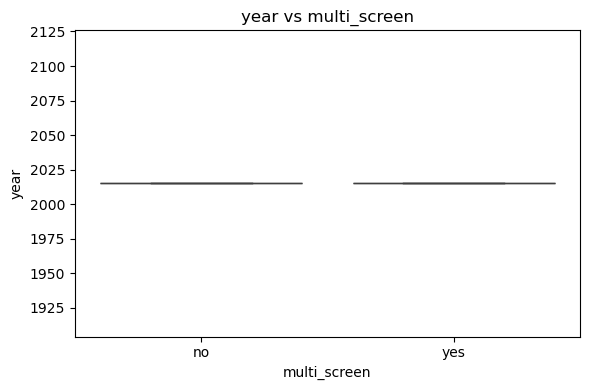

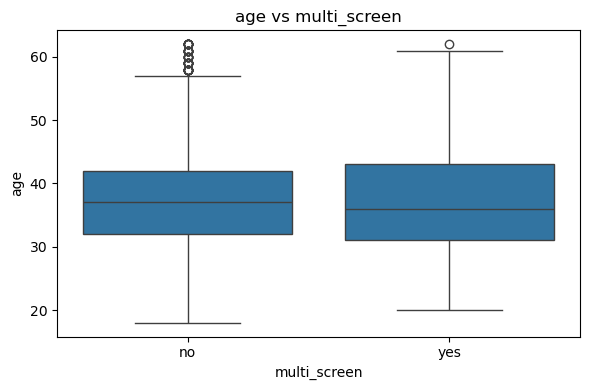

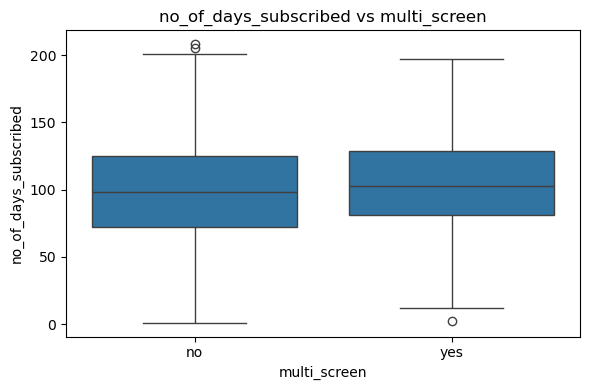

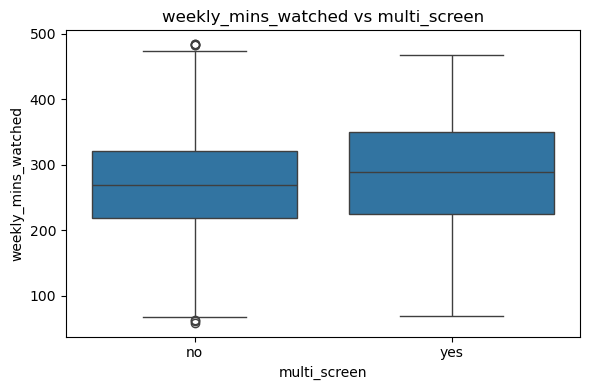

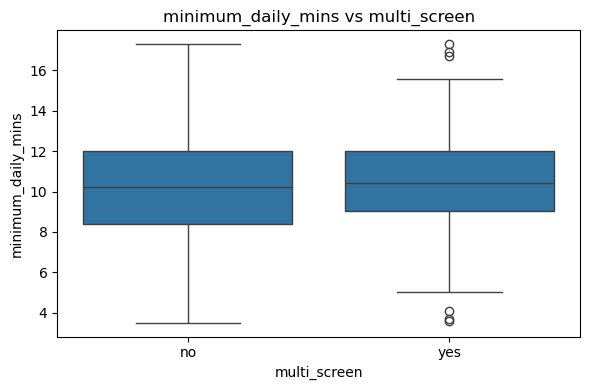

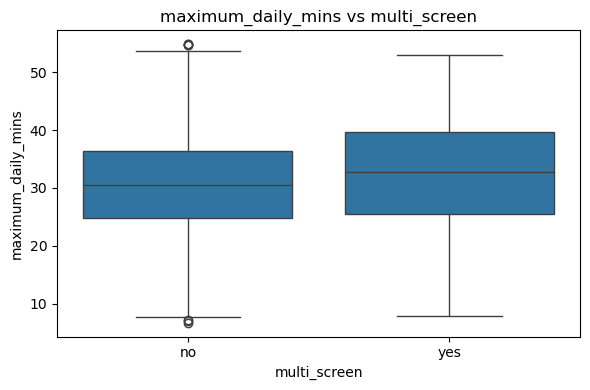

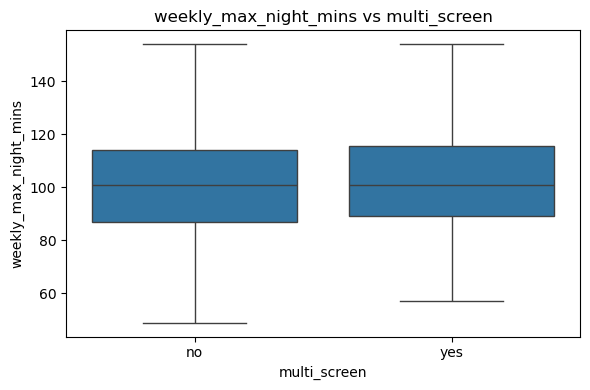

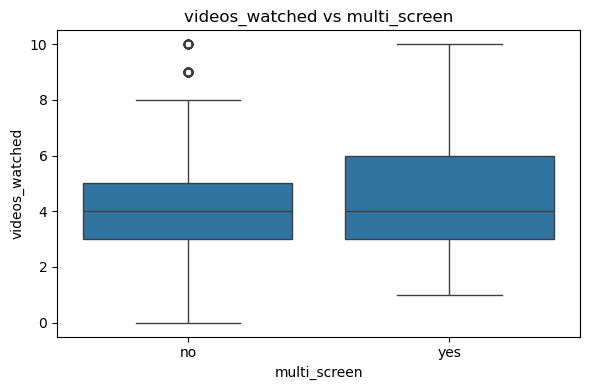

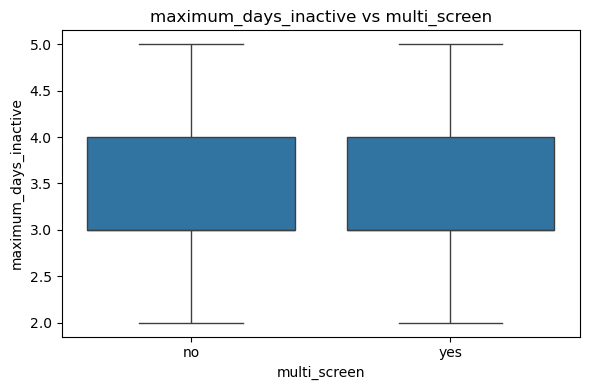

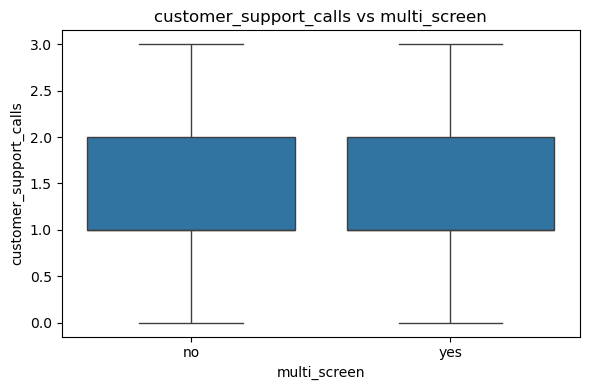

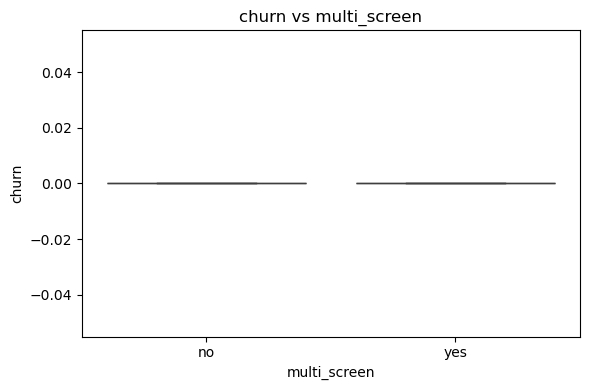

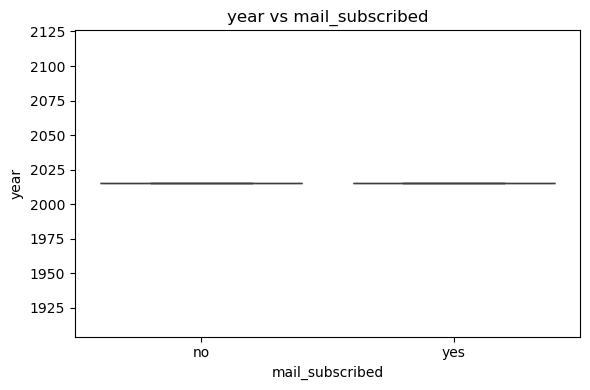

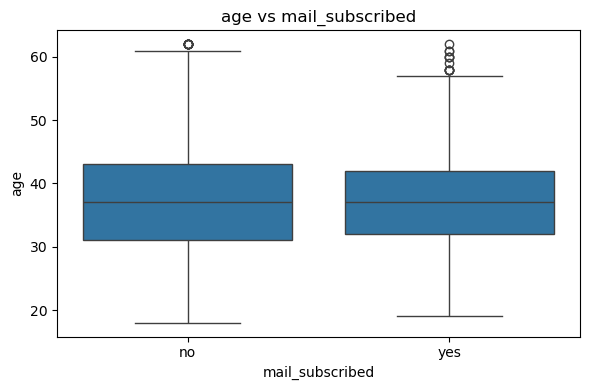

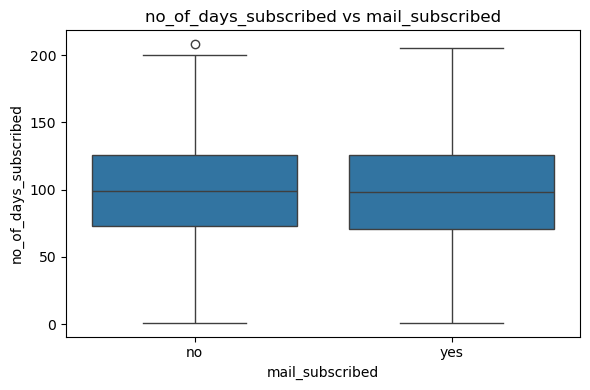

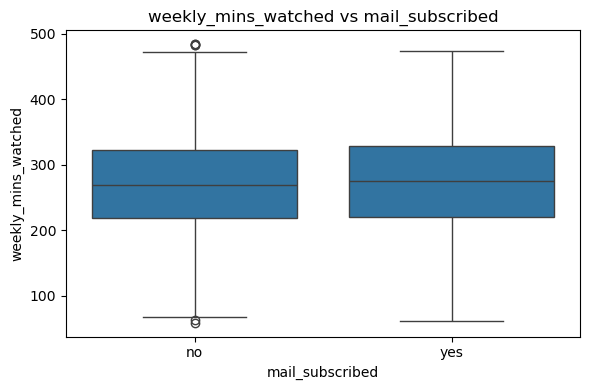

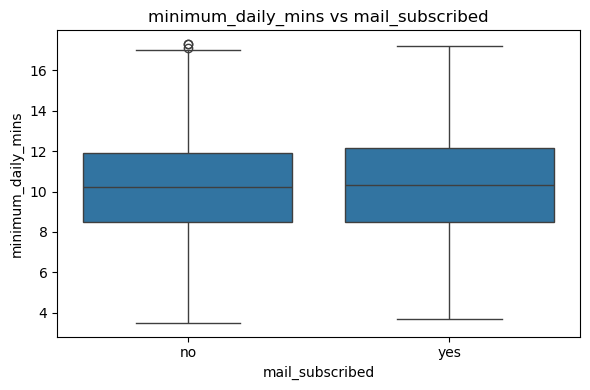

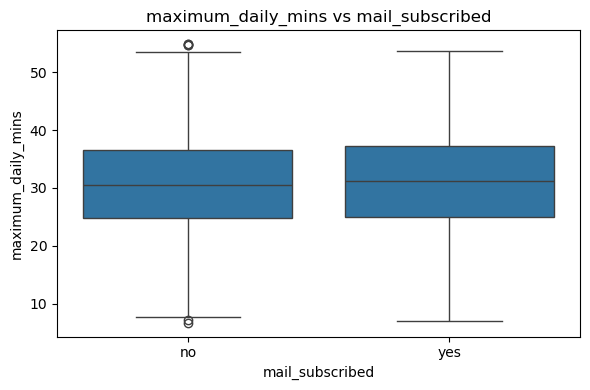

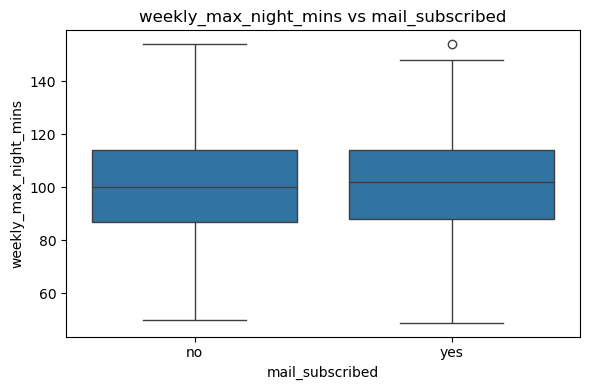

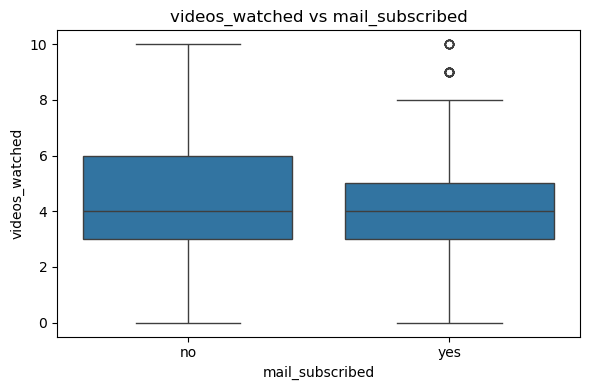

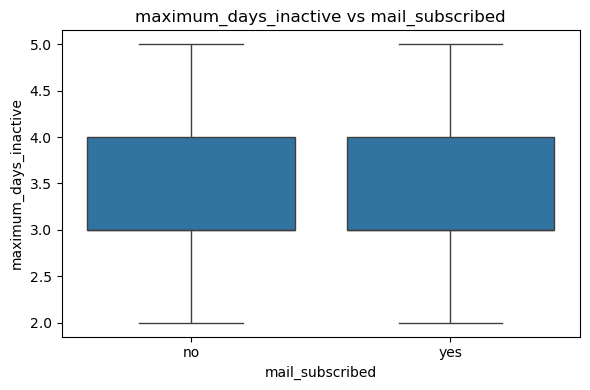

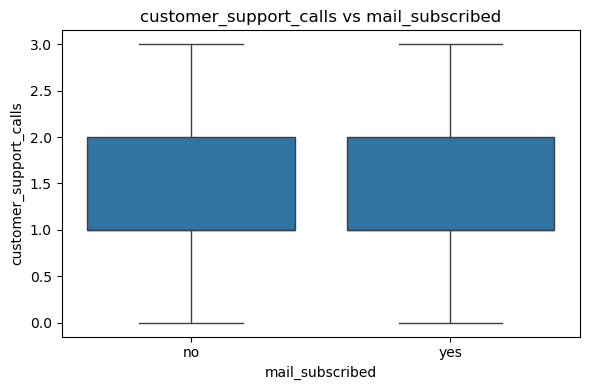

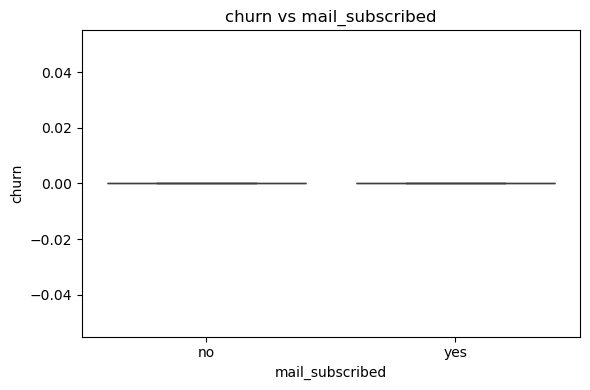

In [20]:
# How one column impacts another column
# Relationship between categorical and numerical variables
import matplotlib.pyplot as plt
# Folder to save data distribution
save_folder = r"C:\Users\tarak\Data Files\EDA\categorical vs numerical"
os.makedirs(save_folder, exist_ok=True)
for i in cat_cols:
    for j in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=churn_df[i], y=churn_df[j])
        plt.title(f"{j} vs {i}")
        plt.xlabel(i)
        plt.ylabel(j)
        plt.tight_layout()
        plt.savefig(f"{save_folder}/{i}_vs_{j}.png")
        plt.show()
        plt.close()


--- Crosstab between gender and multi_screen ---
multi_screen   no  yes
gender                
Female        835   88
Male          967  110


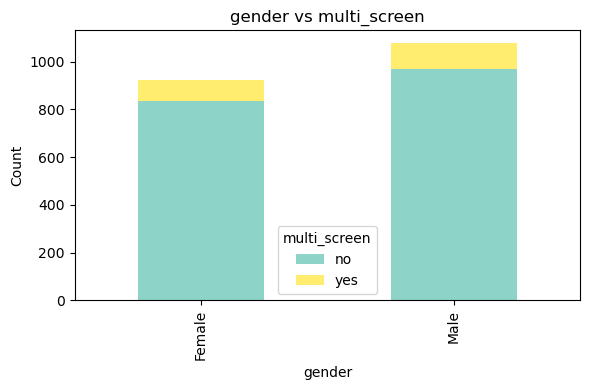


--- Crosstab between gender and mail_subscribed ---
mail_subscribed   no  yes
gender                   
Female           639  284
Male             791  286


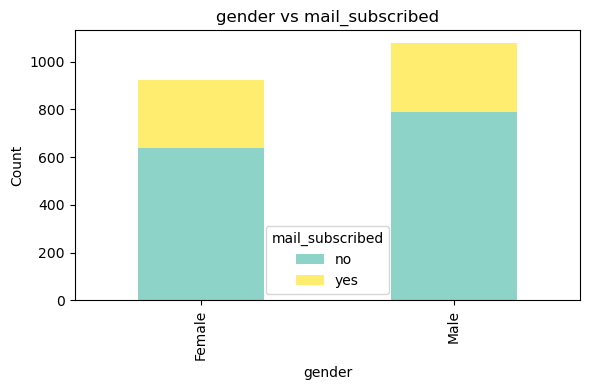


--- Crosstab between multi_screen and mail_subscribed ---
mail_subscribed    no  yes
multi_screen              
no               1294  508
yes               136   62


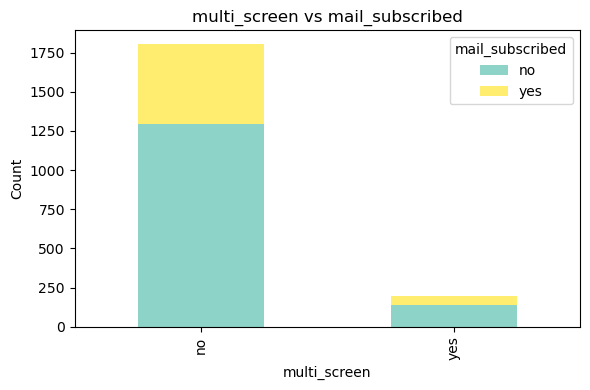

In [21]:
# Example 2: Relationship between two categorical columns
# We'll use a cross-tab (contingency table) and stacked bar chart
import matplotlib.pyplot as plt
# Folder to save data distribution
save_folder = r"C:\Users\tarak\Data Files\EDA\categorical vs categorical"
os.makedirs(save_folder, exist_ok=True)
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        cross_tab = pd.crosstab(churn_df[cat_cols[i]], churn_df[cat_cols[j]])
        print(f"\n--- Crosstab between {cat_cols[i]} and {cat_cols[j]} ---")
        print(cross_tab)
        
        # Plot stacked bar chart
        cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set3')
        plt.title(f"{cat_cols[i]} vs {cat_cols[j]}")
        plt.xlabel(cat_cols[i])
        plt.ylabel("Count")
        plt.tight_layout()
        plt.savefig(f"{save_folder}/{i}_vs_{j}.png")
        plt.show()
        plt.close()


--- Correlation Matrix ---
                        year       age  no_of_days_subscribed  \
year                     NaN       NaN                    NaN   
age                      NaN  1.000000               0.020416   
no_of_days_subscribed    NaN  0.020416               1.000000   
weekly_mins_watched      NaN  0.016250               0.001131   
minimum_daily_mins       NaN  0.011062               0.039527   
maximum_daily_mins       NaN  0.016265               0.001123   
weekly_max_night_mins    NaN  0.012450               0.003276   
videos_watched           NaN  0.002979               0.041836   
maximum_days_inactive    NaN  0.028275               0.034888   
customer_support_calls   NaN -0.007193              -0.014171   
churn                    NaN       NaN                    NaN   

                        weekly_mins_watched  minimum_daily_mins  \
year                                    NaN                 NaN   
age                                0.016250            0.

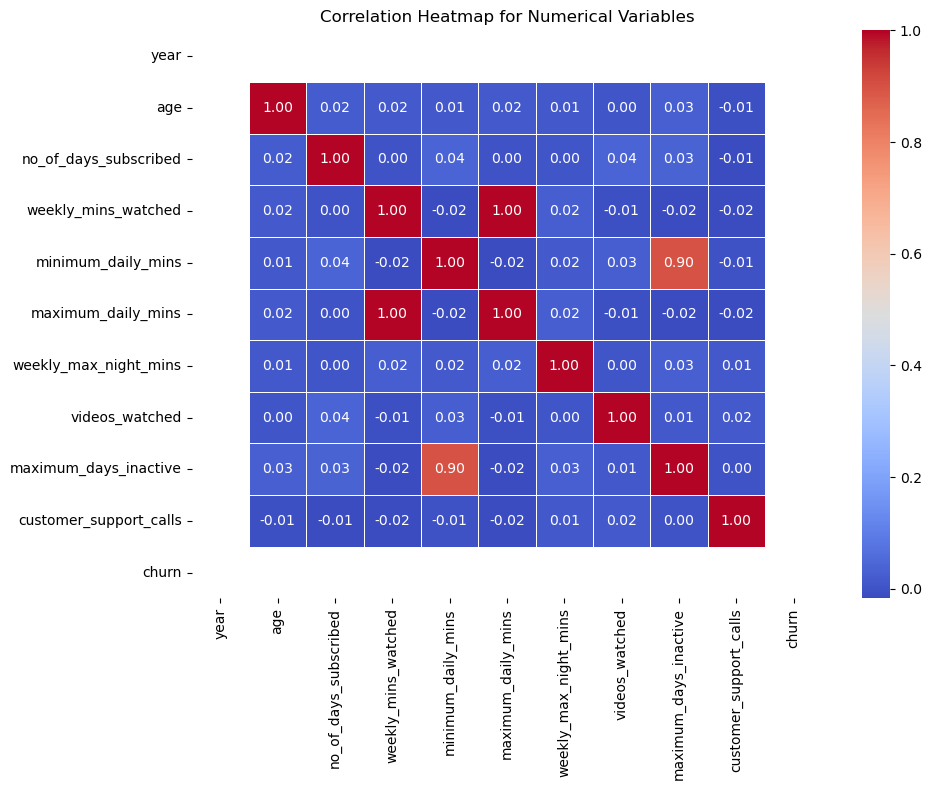

In [22]:
# Correlation (Numerical Columns)
corr_matrix = churn_df[num_cols].corr()
print("\n--- Correlation Matrix ---")
print(corr_matrix)

# Folder to save data distribution
save_folder = r"C:\Users\tarak\Data Files\EDA\Heatmap"
os.makedirs(save_folder, exist_ok=True)

import matplotlib.pyplot as plt
import seaborn as sns
# Heatmap (Visualizing Correlation)c
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Variables")
plt.tight_layout()
plt.savefig(f"{save_folder}/heatmap.png")
plt.show()
plt.close()